In [5]:
import numpy as np

In [6]:
# Choose base task
seed = 2222
idx = 0
base_task = 8
test_task = 8
pred_path = f"task_{base_task}/test_{test_task}/test_{test_task}_preds.npy"

# Data samples to use
data = {
    "GT": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/feedforwardmask_synthetic_continual_er_{seed}_1.0/feedforwardmask/version_0/task_{base_task}/test_{test_task}/test_{test_task}_signals.npy", allow_pickle=True)[idx],
    
    "C-RS": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/feedforwardmask_synthetic_continual_task_aware_{seed}_1.0/feedforwardmask/version_0/{pred_path}", allow_pickle=True)[idx],
    "M-RS": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/maml_synthetic_continual_task_aware_{seed}_1.0/maml/version_0/{pred_path}", allow_pickle=True)[idx],
    "P-RS": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/pns_synthetic_continual_task_aware_{seed}_1.0/pns/version_0/{pred_path}", allow_pickle=True)[idx],
    
    # "C-NL": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/feedforwardmask_synthetic_continual_naive_{seed}_1.0/feedforwardmask/version_0/{pred_path}", allow_pickle=True)[idx],
    # "M-NL": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/maml_synthetic_continual_naive_{seed}_1.0/maml/version_0/{pred_path}", allow_pickle=True)[idx],
    # "P-NL": np.load(f"/home/rxm7244/Projects/CoSFan-NeuralSurrogate/experiments/pns_synthetic_continual_naive_{seed}_1.0/pns/version_0/{pred_path}", allow_pickle=True)[idx],
}

In [9]:
data['GT'].shape
data['C-RS'].shape

(448, 55)

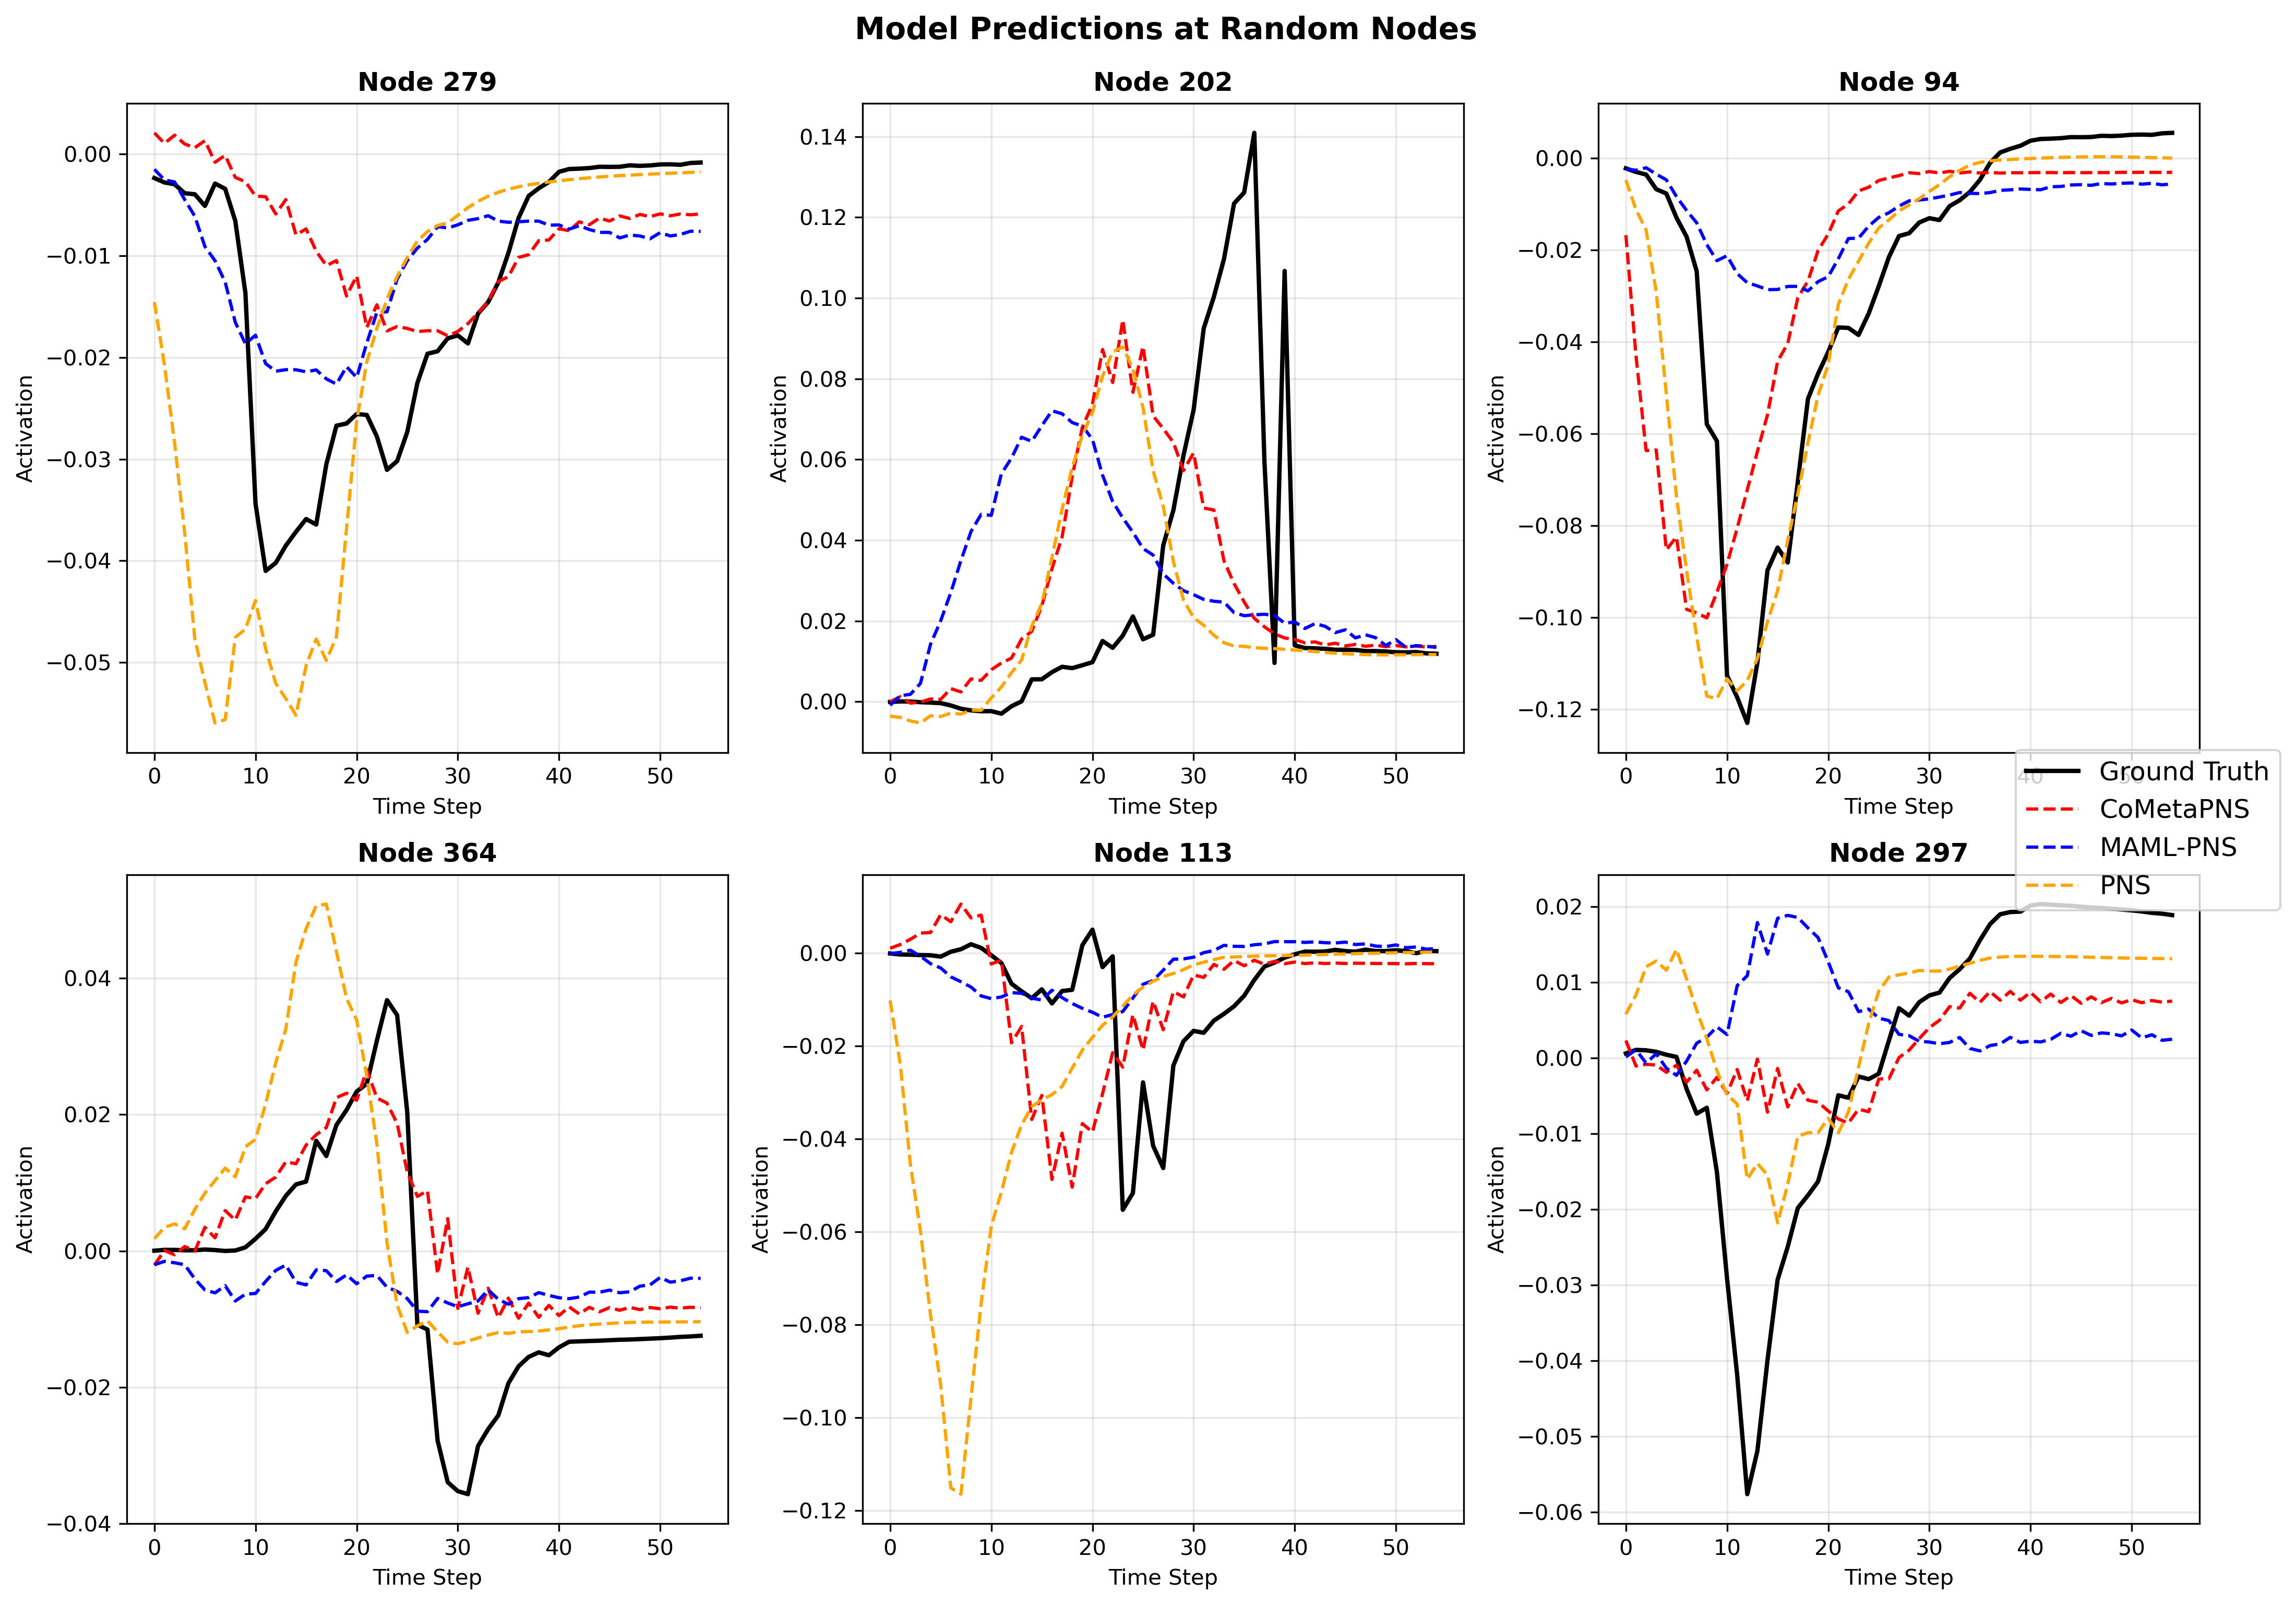

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select random node indices (taking 6 random nodes)
n_nodes = data["GT"].shape[0]  # Get number of nodes in mesh
random_nodes = np.random.choice(n_nodes, size=6, replace=False)

# Create subplot grid (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)
axes = axes.flatten()

# Colors and styles for different models
styles = {
    "GT": {"color": "black", "linestyle": "-", "label": "Ground Truth", "linewidth": 2},
    "C-RS": {"color": "red", "linestyle": "--", "label": "CoMetaPNS", "linewidth": 1.5},
    "M-RS": {"color": "blue", "linestyle": "--", "label": "MAML-PNS", "linewidth": 1.5},
    "P-RS": {"color": "orange", "linestyle": "--", "label": "PNS", "linewidth": 1.5}
}

# Time steps for x-axis
time_steps = np.arange(data["GT"].shape[1])

# Plot each random node in a different subplot
for idx, node in enumerate(random_nodes):
    ax = axes[idx]
    
    # Plot each model's prediction for this node
    for model_name, style in styles.items():
        ax.plot(time_steps, data[model_name][node, :], 
                **style)
    
    ax.set_title(f'Node {node}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Time Step', fontsize=10)
    ax.set_ylabel('Activation', fontsize=10)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, 
          loc='center right', 
          bbox_to_anchor=(0.98, 0.5),
          fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.95, 1])

# Add a title for the entire figure
fig.suptitle('Model Predictions at Random Nodes', 
             fontsize=14, 
             fontweight='bold',
             y=1.02)

# Save the figure
plt.savefig('random_node_sequences.svg', 
            bbox_inches='tight', 
            dpi=300)
plt.show()
plt.close()